# FEEG 1001 Design and Computing
## Acoustical Computational Design Exercise
### Matthew  Wright mcmw@isvr.soton.ac.uk
In this session we're going to use Python/NumPy/Matplotlib to examine waves moving in one dimension - an example of this would be low-frequency sound propagating in a slender air-filled pipe. Stated mathematically, we're interested in a function $p(x,t)$ of two variables that represents how the pressure varies with $x$, the distance along the pipe, and $t$ the time.

Before we begin begin we'll use the `pylab` magic to import the functions from NumPy and Matplotlib that we'll need, and we'll specify that we want our plots to appear in the notebook rather than in a separate window.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We'll start with a function $f(x)$ of a single variable as follows. We call this Python implementation of it `f_scalar_arg()` to remind us that we can only call it when `x` is a single number.

In [2]:
def f_scalar_arg(x):
    if 0 < x < 1:
        return 1.0
    elif 1 <= x < 2:
        return x
    else:
        return 0.0

We can create a corresponding function that works when the array is an array like this:

In [3]:
f = vectorize(f_scalar_arg)

and we can plot it like this

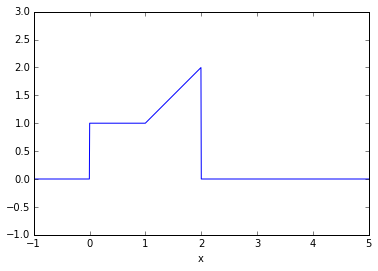

In [4]:
x = linspace(-1,5,1000)
plot(x,f(x),'b')
axis('equal')            # Make x and y axis scales the same size 
xlabel('x')

What happens to the line if we subtract a number from the argument before we plot it? In other words how does a graph of $f(x - \xi)$ differ from one of $f(x)$? We ought to be able to work this out but we can check we're right by plotting both on the same axes, for a chosen value of $\xi$, in this case $0.3$. We'll use different colours for the two lines so we can be sure which is which.

(-1.0, 5.0, 0.0, 2.0)

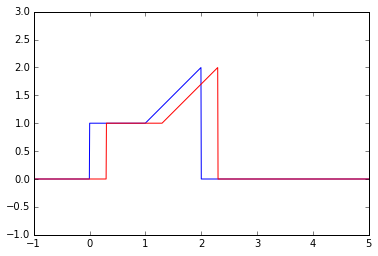

In [5]:
plot(x,f(x),'b', x,f(x - 0.3),'r')
axis('equal')

Try changing the `0.3` in the previous cell to different numbers and executing it again.

If we want the pressure field in our pipe to be a wave that moves to the right as time increases then we could make $p(x,t)$ equal to $f(x)$ with a quantity subtracted from $x$ that's proportional to $t$ e.g. $p(x,t) = f(x - ct)$. 

What are the dimensions of $c$? Well, $x$ has the dimensions of length (SI units: metres), so $ct$ must have the same dimensions; $t$ has the dimensions of time (SI units: seconds) so $c$ must have dimensions 'length over time' and units metres per second. 

For our Python version of $p(x,t)$ we'll make `c` a global variable so it has the same value in all functions.

In [6]:
c = 1.0
def p(x, t):
    return f(x - c*t)

Let's check that this behaves as we want, i.e. that the shape moves to the right as time increases:

(-1.0, 5.0, 0.0, 2.0)

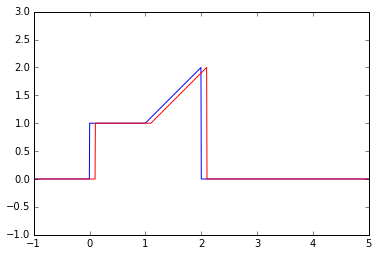

In [7]:
plot(x, p(x, 0), 'b',
     x, p(x, 0.1), 'r')
axis('equal')

## Exercise

Verify that if we increase $c$ the shape moves further in the same time interval, i.e. that $c$ is the wave speed.

---

## Moving pictures
It would be nice to see our wave moving. We can do this in Python but we need to tell Matplotlib to produce our figures in external windows, and we need to import some more functions:

In [8]:
%matplotlib
import matplotlib.animation as animation

Using matplotlib backend: Qt4Agg


The code in the following cell makes our shape move at speed $c$ for $1$ second by producing a movie with 60 'frames' and displaying each frame for 50 milliseconds.

In [11]:
def g_scalar_arg(x):
    if 3 < x < 5:
        return -sqrt(1 - (4 - x)**2)
    else:
        return 0.0

g = vectorize(g_scalar_arg)

def p(x,t):
    return f(x - c*t) + g(x + c*t)

In [12]:
c = 1.0
movie = []                              # Create an empty list 
fig, ax = subplots()
for t in linspace(0, 5, 60):            # Our movie will have 50 frames
    frame = ax.plot(x, p(x, t), 'b', 2.5, 0, 'ro')    # Create a frame
    axis('equal')
    movie.append(frame)                 # Add it to the movie
    
ani = animation.ArtistAnimation(fig, movie, interval=50)      # Show each frame for 50 milliseconds
fig.show() 

### Exercises
1. Modify the code so that the movie corresponds to five seconds of wave motion.
2. Make a Python version of the function $g(x) = -\sqrt{1 - (4-x)^2}$ for $3<x<5$ and zero elsewhere. Plot it to make sure it represents a unit semicircle with its centre at $x = 4$.
 1. Set $p(x, t) = g(x + ct)$ and verify that this wave moves to the left.
 2. Set $p(x, t) = f(x - ct) + g(x + ct)$ and verify that the waves  superimpose once they move far enough.

## Surfaces
The function $p(x,t)$ can also be plotted as a surface on 3D axes if we import suitable functions. We could make these plots inline but if we keep using external windows we can rotate the surfaces.

In [13]:
from mpl_toolkits.mplot3d import Axes3D

Then we need to use `meshgrid` to create arrays of $x$ and $t$ values.

In [14]:
x, t = meshgrid(linspace(0,5,200), linspace(0,5,200))

We'll reset our definitions of `p()` and `c` too. We'll just have the right-going wave for now.

In [23]:
c = 1.0
def p(x,t):
    return f(x - c*t)

In [24]:
fig = figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,t,p(x,t), rstride=5, cstride=5, cmap=cm.cool)
ax.set_xlabel('x')
ax.set_ylabel('t')
axis('equal')

(0.0, 5.0, 0.0, 5.0)

The surface isn't perfectly resolved but it should be possible to see what's going on.
### Exercises
Try to predict the effect *before* executing the cell.
1. Change the wave speed to $c=2$ and re-plot the surface. 
2. Set $c = 1$ again and set $p(x,t) = g(x + ct)$ and re-plot.
3. Set $p(x,t) = f(x-ct) + g(x+ct)$ and re-plot.

---

We've just been choosing definitions for $p(x,t)$ that happen to correspond to plausible-looking waves. To verify that they corespond to physical behaviour we should substitute them into the wave equation (a partial differential equation) to see if they satisfy it. For now, however, you'll just have to take it on trust that they do, whereas, for example $p(x,t) = f(x)$ (which doesn't move) doesn't.

### Exercises
1. Define a function $h(x)$, so that when you set $p(x,t) = f(x-ct)+h(x + ct)$ you get $p(x=2.5,t) = 0$ for all $t$. In other words you need to create a left-going wave that interferes with the right-going wave to cancel it out at the point $x = 2.5$. 
2. Plot a surface and an animation to verify that it's worked. 
3. Make a new notebook with all the imports, definitions and code necessary to illustrate this. Add markdown cells that explain what's happening. This notebook will be your first output for this design exercise.

---

$$ p(2.5,t) = 0 $$
$$ p(x,t) = f(x-ct) + h(x+ct) $$
$$ f(2.5 - ct) + h(2.5 + ct) = 0 $$